## Voting Cassifier on Iris Dataset using Ensemble Methods

## Importing Libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [4]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/Iris flower prediction.csv')
df.shape

(150, 5)

## Data Preprocessing

In [5]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df.iloc[:, -1].value_counts())

Dataset shape: (150, 5)

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Class distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [6]:
X = df.drop(df.columns[-1], axis=1)
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

Train set: (120, 4)
Test set: (30, 4)


## Training and Evaluation

In [7]:
svc = SVC(kernel='linear', probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

voting_clf = VotingClassifier([('svc', svc), ('dt', dt), ('knn', knn)], voting='soft')

voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Voting Ensemble Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Voting Ensemble Metrics:
Accuracy:  0.9000
Precision: 0.9024
Recall:    0.9000
F1-Score:  0.8997


In [8]:
models = [svc, dt, knn]
model_names = ['SVC', 'Decision Tree', 'KNN']
model_acc = []

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred_model = model.predict(X_test_scaled)
    acc_model = accuracy_score(y_test, y_pred_model)
    model_acc.append(acc_model)
    print(f"{name:20} - Accuracy: {acc_model:.4f}")

print(f"{'Voting Ensemble':20} - Accuracy: {accuracy:.4f}")

SVC                  - Accuracy: 1.0000
Decision Tree        - Accuracy: 0.9000
KNN                  - Accuracy: 0.9333
Voting Ensemble      - Accuracy: 0.9000


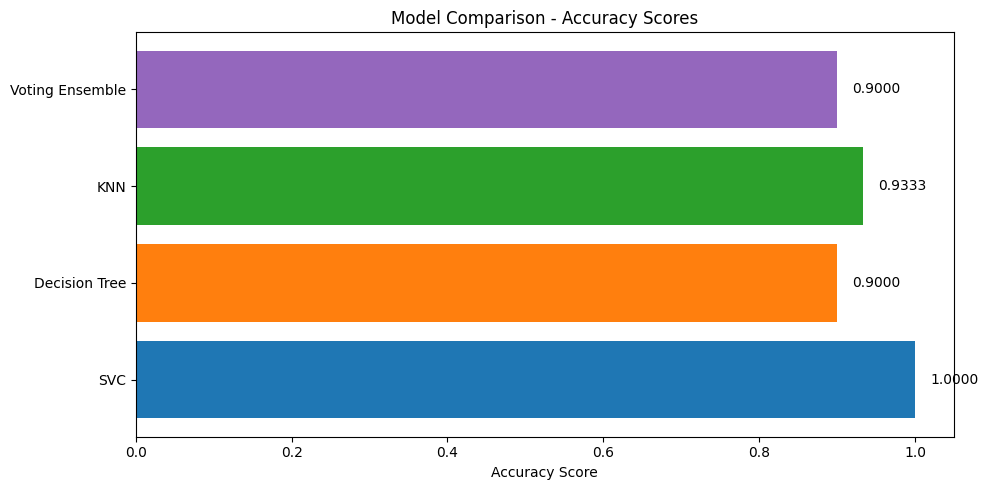

In [9]:
plt.figure(figsize=(10, 5))
models_list = model_names + ['Voting Ensemble']
acc_scores = model_acc + [accuracy]
plt.barh(models_list, acc_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])
plt.xlabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Scores')
plt.xlim(0, 1.05)
for i, v in enumerate(acc_scores):
    plt.text(v + 0.02, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

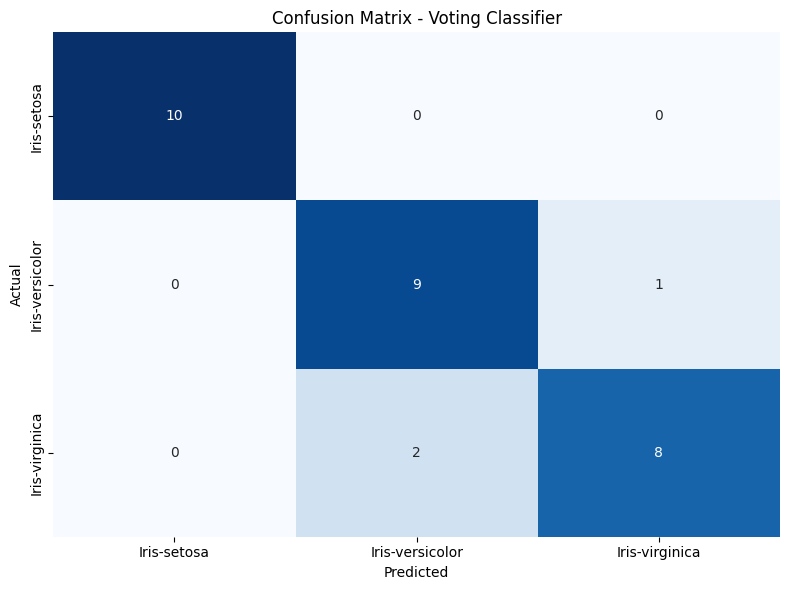


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Voting Classifier')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Thanks!